In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'no-latex'])

In [29]:
#Función para calcular los pesos según el grado
def cost_train_data(x, y, n= 1):
     
    # x = np.asarray([x])
    # X = np.ones_like(x)
    
    # for i in range(1, n+1):
    #     X = np.append(X, x**(i), axis=0)
    datax = [x**(i) for i in range(n+1)]
    X = np.vstack(datax).T
    #Implementamos en forma matricial, el calculo de los pesos
    # XX = np.matmul(X.T, X)
    # xt = np.matmul(X.T, y)
    # invXX = np.linalg.inv(XX) 
    # w = np.matmul(invXX, xt)
    
    w = np.linalg.inv(X.T @ X) @ X.T @ y    
    cost = np.sum((X @ w - y)**2)
 
    return cost

data = np.loadtxt('../Data/olympic100m_men.txt', delimiter=',').T

x = data[0]
x = (x-1896)/4
y = data[1]

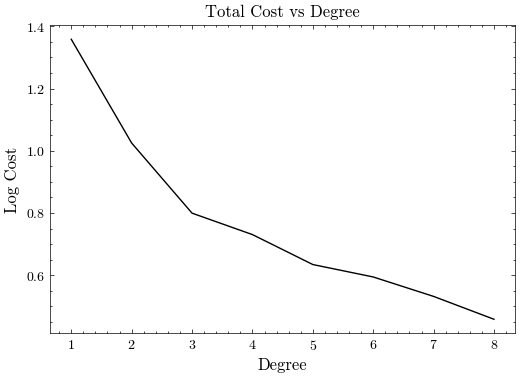

In [31]:
degree = 8
costes = [cost_train_data(x, y, i) for i in range(1, degree+1)]
degrees = np.arange(1,degree+1)

fig = plt.figure(figsize=(6, 4))
plt.plot(degrees, costes, 'k')
#plt.yscale('log')
plt.xlabel('Degree', fontsize= 12)
plt.ylabel('Log Cost', fontsize= 12);
plt.title('Total Cost vs Degree');


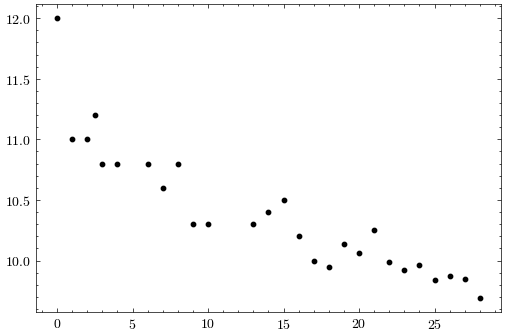

In [38]:
fig = plt.figure(figsize=(6, 4))
plt.scatter(x, y, color = 'black', s = 10);


In [33]:
#Definimos una función para calcular el coste, una vez ajustado el modelo
def cost_validation(x, y, weights):
    datax = np.vstack([x**(i) for i in range(len(weights))]).T
    predictions = datax @ weights
    cost = np.sum((predictions - y)**2)
    return cost

def weight_model(x, y, n= 1):
    
    datax = [x**(i) for i in range(n+1)]
    X = np.vstack(datax).T
    #Implementamos el modelo en forma matricial
    w = np.linalg.inv(X.T @ X) @ X.T @ y    

    return w

21.0

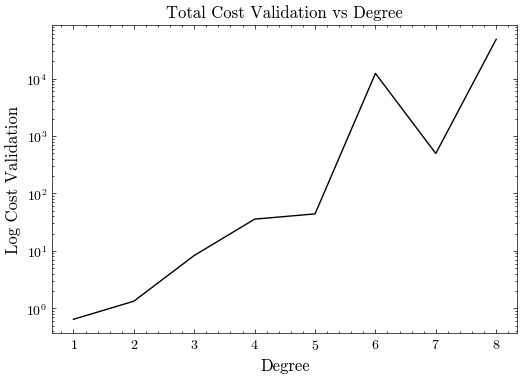

In [42]:
#Generamos nuestro conjunto de validación
validation_set_x = x[x>21]
validation_set_t = y[x>21]

train_set_x = x[x<21]
train_set_y = y[x<21]

degree = 8 
degrees = np.arange(1,degree+1)

#Calculamos los pesos hasta grado 8
weights = [weight_model(train_set_x, train_set_y, i) for i in range(1, degree+1)]
#Calculamos los costos del conjunto de validación, en cada uno de los modelos
cost_validations = [cost_validation(validation_set_x, validation_set_t, w) for w in weights]

fig = plt.figure(figsize=(6, 4))
plt.plot(degrees, cost_validations, 'k')
plt.yscale('log')
plt.xlabel('Degree', fontsize= 12)
plt.ylabel('Log Cost Validation', fontsize= 12);
plt.title('Total Cost Validation vs Degree');


In [43]:
#Leave-One-Out-Croos-Validation

def leave_one_out_cross_validation(x, y, n):
    #Definimos el número de samples, que tomaremos
    #Este caso k = N
    samples = len(x)
    total_cost = 0
    
    for i in range(samples):
       #Tomamos un dato para validar nuestro modelo
       x_val = x[i]
       y_val = y[i]
       
       #Tomamos el resto del dataset, para poder entrenar nuestro modelo
       x_train = np.delete(x, i)
       y_train = np.delete(y, i)
       
       #"Entrenamos" el modelo
       w_aux = weight_model(x_train, y_train, n)
       
       #Calculomos su cost validation
       cost = cost_validation(x_val, y_val, w_aux)
       #Sumamos los costos
       total_cost += cost
    
    
    return total_cost/samples       
    

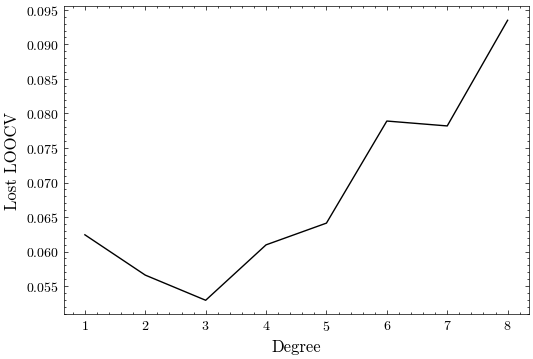

In [45]:
degree = 8    
degrees = np.arange(1,degree+1)
 
loocv = [leave_one_out_cross_validation(x, y, i) for i in range(1,degree+1)]

fig = plt.figure(figsize=(6, 4))
plt.plot(degrees, loocv, 'k')
# plt.yscale('log')
plt.xlabel('Degree', fontsize= 12)
plt.ylabel('Lost LOOCV', fontsize= 12);